<a href="https://colab.research.google.com/github/ParbatiDebbarma/Yulu-HypothesisTesting/blob/main/BUSINESS_CASE_YULU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS CASE: YULU- HYPOTHESIS TESTING**

---



**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Business problem :**

The company wants to know which variables are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables describe the electric cycle demands

**Dataset:**

**datetime**: datetime

**season:** season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday:** whether day is a holiday or not

**workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** temperature in Celsius

**atemp:** feeling temperature in Celsius

**humidity:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**count:** count of total rental bikes including both casual and registered

In [ ]:
#importing all modules for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kruskal

In [ ]:
df = pd.read_csv('/content/bike_sharing.csv') #reading the dataset
df.head() #prints the first five records in the Dataframe

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
#prints the number of rows and columns in the dataset
print(f'No. of Rows in the Dataset: {df.shape[0]}\nNo. of Columns in the Dataset: {df.shape[1]}')

No. of Rows in the Dataset: 10886
No. of Columns in the Dataset: 12


In [ ]:
df.isnull().sum() #prints the number of nulls in the dataset

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no nulls in the dataset

---



In [ ]:
df.duplicated().sum() #prints the number of duplicates in the dataset

0

There are no duplicates in the dataset

---



In [ ]:
df.info() #prints the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The datatype of the following columns need to be changed

**datetime** - datetime

**season** - categorical

**holiday** - categorical

**workingday** - categorical

**weather** - categorical

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) #changing the datatype of the datetime column

In [ ]:
df['season'] = df['season'].astype('category')#changing the datatype of the season column

In [ ]:
df['holiday'] = df['holiday'].astype('category')#changing the datatype of the holiday column

In [ ]:
df['workingday'] = df['workingday'].astype('category')#changing the datatype of the workingday column

In [ ]:
df['weather'] = df['weather'].astype('category')#changing the datatype of the weather column

Let's check the datatypes again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


**Checking statistical summary of integer type of data**

In [ ]:
df.describe() #prints the summary statistics of the dataset

datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

**Checking statistical summary of the categorical data**

In [ ]:
cat_cols = ['season', 'holiday', 'workingday', 'weather'] #list of categorical columns

In [ ]:
df[cat_cols].describe() #prints the summary statistics of the categorical columns

season  holiday  workingday  weather
count    10886    10886       10886    10886
unique       4        2           2        4
top          4        0           1        1
freq      2734    10575        7412     7192

- The dataset has 10,886 entries
- The most frequent season is winter (season = 4), accounting for 2,734 entries.
- The dataset predominantly consists of non-holiday (holiday = 0),working days(workingday = 1),and clear weather conditions (weather = 1).

# **Non-Graphical Analysis**

In [ ]:
# Checking the unique values for columns
for col in df.columns:
    print()
    print(f'Total Unique Values in {col} column are :- {df[col].nunique()}')
    print(f'Unique Values in {col} column are :-\n{df[col].unique()}')
    print()
    print('-' * 130)


Total Unique Values in datetime column are :- 10886
Unique Values in datetime column are :-
<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
 '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
 '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
 '2012-12-19 23:00:00']
Length: 10886, dtype: datetime64[ns]

----------------------------------------------------------------------------------------------------------------------------------

Total Unique Values in season column are :- 4
Unique Values in season column are :-
[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

------------------------------------------------------------------------------------------------------------------

In [ ]:
#prints the range of dates in the dataset
print(f"In the dataset, the date ranges from: {df['datetime'].min()}\nto: {df['datetime'].max()}")

In the dataset, the date ranges from: 2011-01-01 00:00:00
to: 2012-12-19 23:00:00


In [ ]:
df.datetime.max() - df.datetime.min() #prints the duration of the dataset

Timedelta('718 days 23:00:00')

In [ ]:
for col in df.columns:
    if df[col].dtype=='category':
        print(df[col].value_counts().to_frame())
        print()
        print('-'*130)
        print()

        count
season       
4        2734
2        2733
3        2733
1        2686

----------------------------------------------------------------------------------------------------------------------------------

         count
holiday       
0        10575
1          311

----------------------------------------------------------------------------------------------------------------------------------

            count
workingday       
1            7412
0            3474

----------------------------------------------------------------------------------------------------------------------------------

         count
weather       
1         7192
2         2834
3          859
4            1

----------------------------------------------------------------------------------------------------------------------------------



In [ ]:
for col in df.columns:
    if df[col].dtype=='category':
        print()
        display(np.round(df[col].value_counts(normalize = True) * 100, 2))
        print()
        print('-'*130)
        print()

season
4    25.11
2    25.11
3    25.11
1    24.67
Name: proportion, dtype: float64


----------------------------------------------------------------------------------------------------------------------------------




holiday
0    97.14
1     2.86
Name: proportion, dtype: float64


----------------------------------------------------------------------------------------------------------------------------------




workingday
1    68.09
0    31.91
Name: proportion, dtype: float64


----------------------------------------------------------------------------------------------------------------------------------




weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64


----------------------------------------------------------------------------------------------------------------------------------



# **VISUAL ANALYSIS : Univariate and Bivariate**

---



**Distribution of categorical variables**

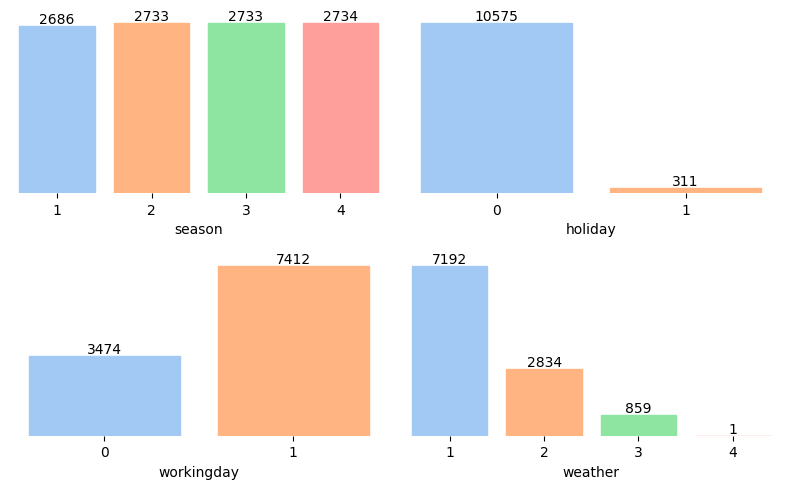

In [ ]:
# Setting the figure size
plt.figure(figsize=(8, 5))



# Defining a list of pastel colors
pastel_colors = sns.color_palette("pastel", n_colors=4)

# Initializing subplot index
i = 1

# Iterates over columns in the DataFrame
for col in df.columns:
    if df[col].dtype == 'category':
        plt.subplot(2,2, i)
        # Plot countplot without palette
        a = sns.countplot(data=df, x=col)

        # Manually set colors for each bar
        for idx, bar in enumerate(a.patches):
            bar.set_color(pastel_colors[idx % len(pastel_colors)])


        a.bar_label(a.containers[0], label_type='edge')
        sns.despine(left=True, bottom=True)
        plt.yticks([])
        plt.ylabel('')
        i += 1

# Adjusting layout
plt.tight_layout()

# Shows the plot
plt.show()



**Distribution of numeric variables**

---



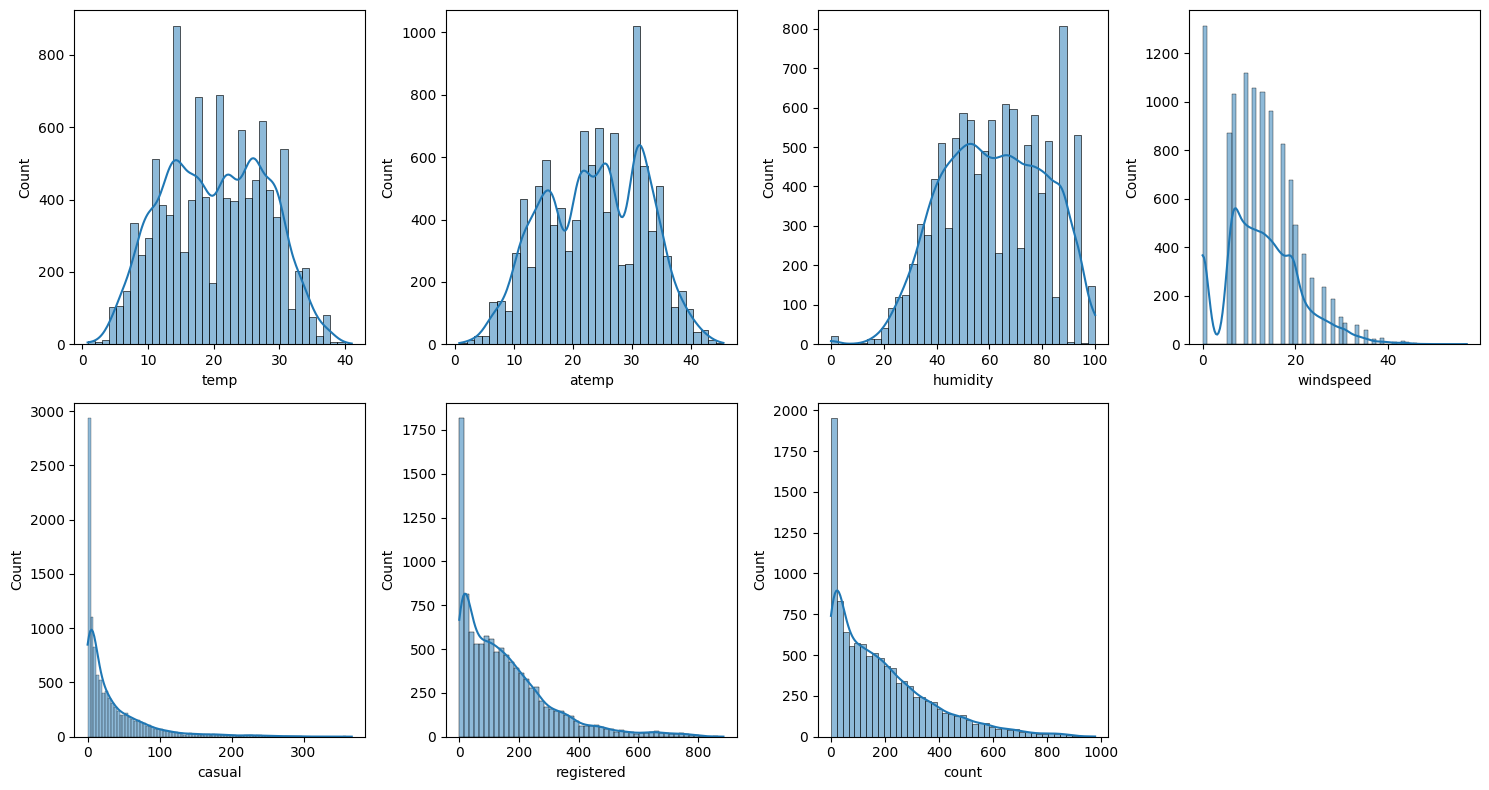

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'] #list of numeric columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8)) #setting the figure size

index = 0 #initializing the index

for col in num_cols:
    sns.histplot(data=df, x=col, kde=True, ax=axes[index // 4, index % 4])
    index += 1

# Turning off the last (8th) empty subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show() #shows the plot


- Casual, Registered andCount somewhat looks likeLog Normal Distribution
- Temp, Atemp and Humidity looks like they follows theNormal Distribution
- Windspeed follows the binomial distribution

**Outliers in the data: BoxPlots**

---



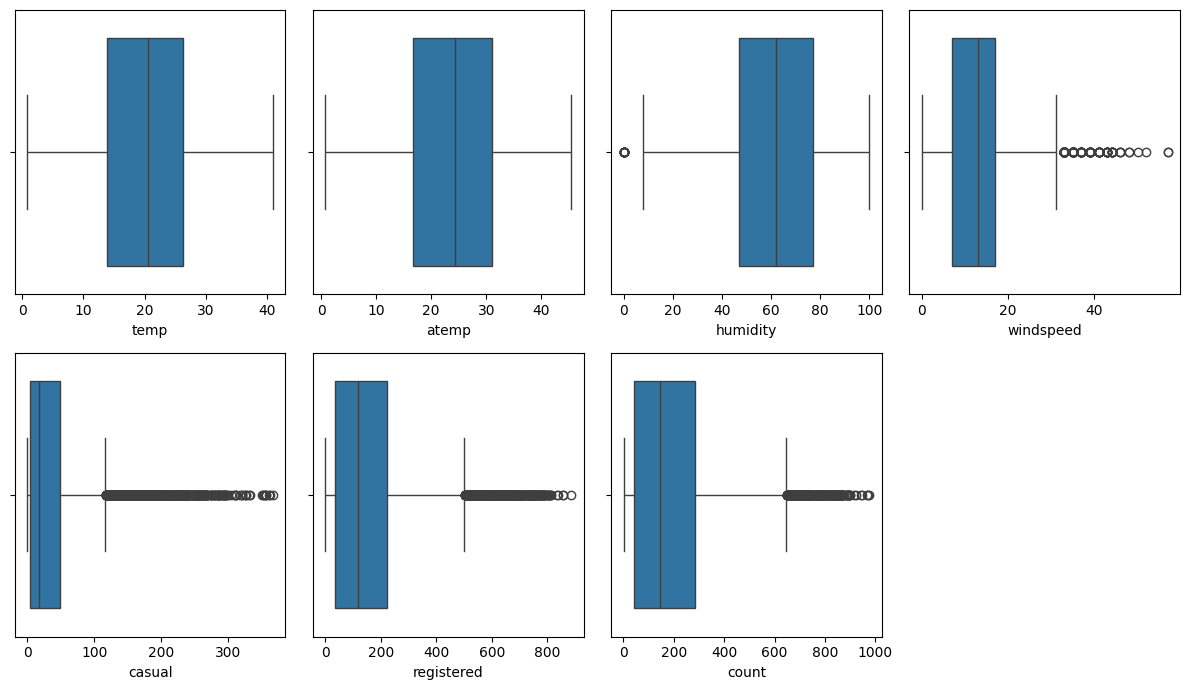

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'] #list of numeric columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 7)) #setting the figure size

index = 0 #initializing the index

for col in num_cols:
    sns.boxplot(data=df, x=col, ax=axes[index // 4, index % 4])
    index += 1

# Turning off the last (8th) empty subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show() #shows the plot

- **Windspeed**, **casual** **users**, **registered** **users**, and **total** **count** have significant outliers, especially on the higher end of the distribution. This suggests that under certain conditions (possibly due to external factors like weather, events, or promotions), the platform experienced unusual spikes in these metrics.
- **Humidity** has a single low-end outlier, possibly due to an abnormal weather condition during data collection.

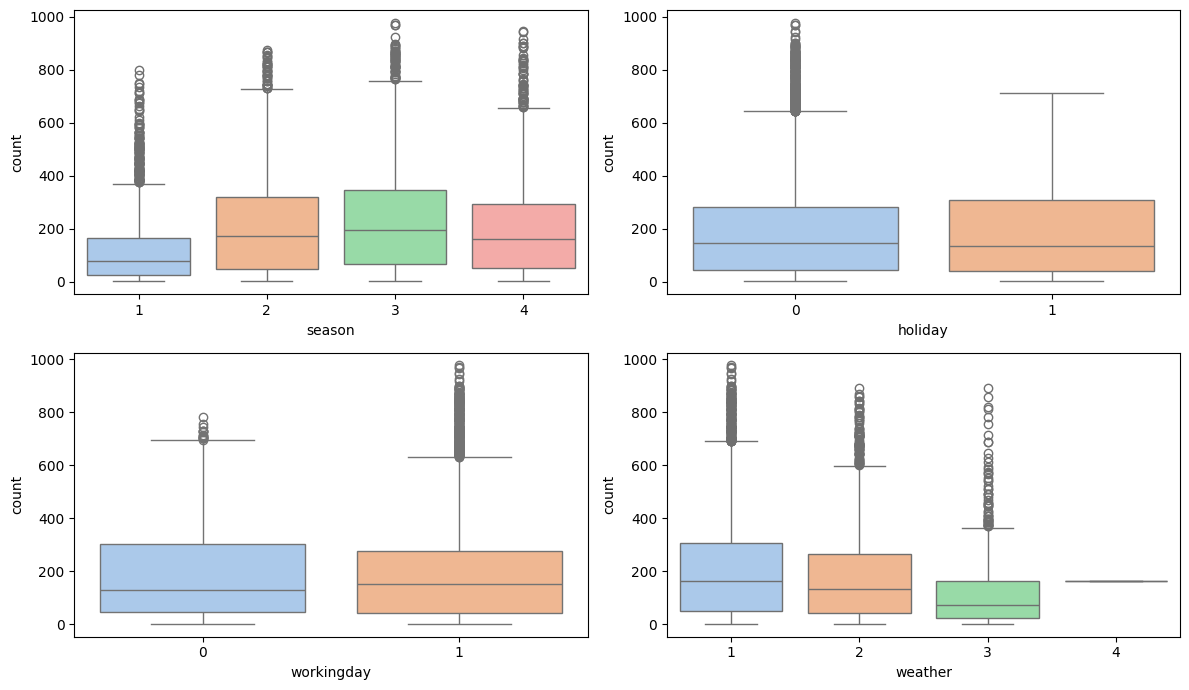

In [ ]:
# Define categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

# Set up a figure and axis with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

# Define a list of pastel colors
pastel_colors = sns.color_palette("pastel")

# Loop through the categorical columns and plot with different colors
for index, col in enumerate(cat_cols):
    unique_values = df[col].nunique()  # Find the number of unique categories in the column
    sns.boxplot(
        data=df,
        x=col,
        y='count',
        ax=axes[index // 2, index % 2], hue= col,
        palette=pastel_colors[:unique_values],
        legend=False  # Disable legend
    )

plt.tight_layout()
plt.show()

- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend,slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes rented

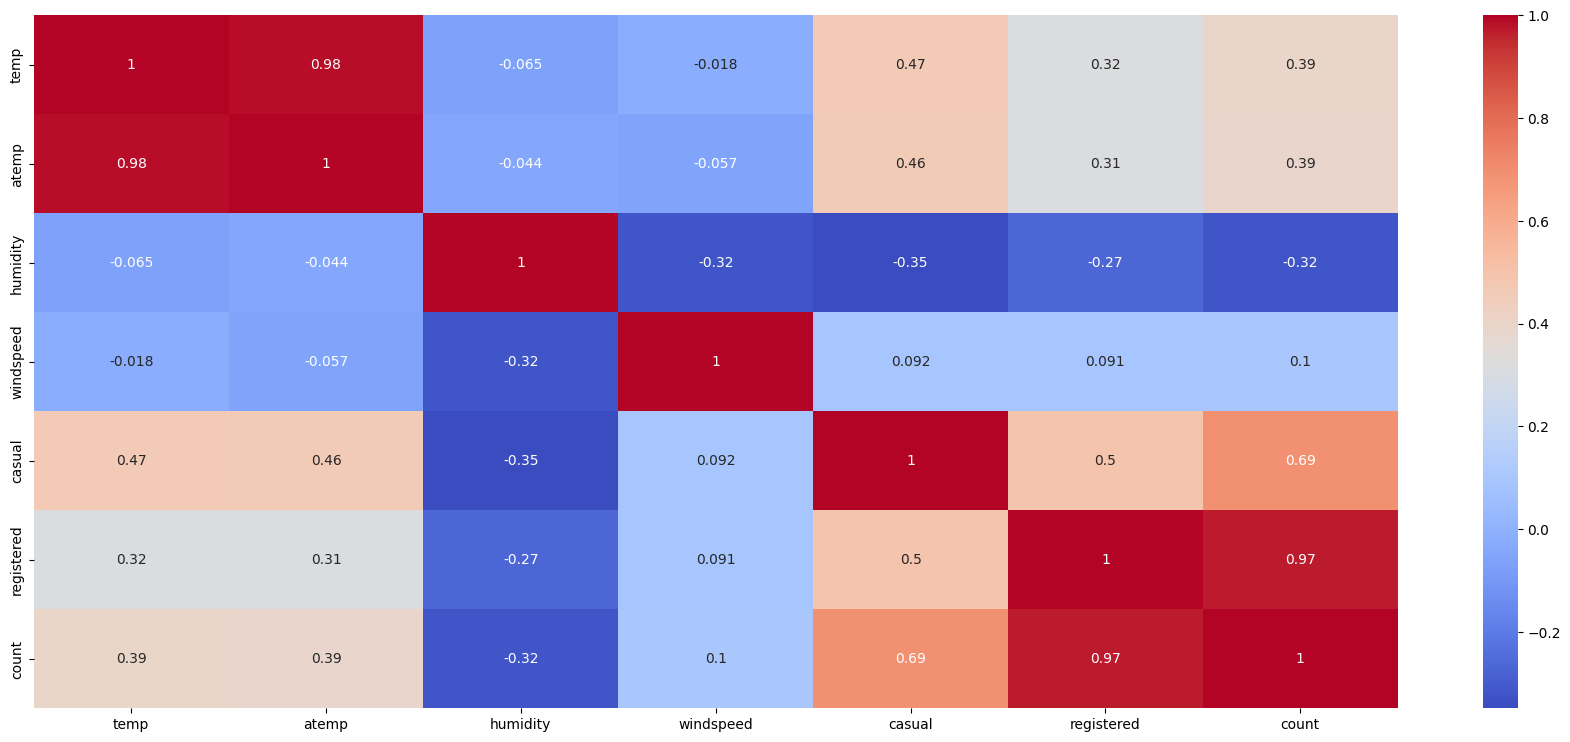

In [ ]:
plt.figure(figsize=(22,9)) #setting the figure size
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", xticklabels=1, yticklabels=1)
plt.show() #shows the plot


- Very high correlation (> 0.9) between 'atemp' and 'temp,' indicating a strong positive linear relationship. Low positive correlation (0.3 - 0.5) exists between 'count' and both 'temp' and 'atemp'.
- Moderate positive correlation (0.5 - 0.7) between 'casual' and 'count,' as well as 'casual' and 'registered'. Strong positive correlation between 'casual' and 'count,' suggesting casual users significantly contribute to the overall demand.
- There are moderate positive correlations between 'season' with both 'temp' and 'atemp,' and between 'weather' and 'humidity.' Additionally, 'workingday' shows a moderate correlation with 'count,' indicating higher demand on weekdays. The correlation between 'casual' and 'registered' users emphasizes their combined impact on total demand, while temperature positively influences both 'casual' users and overall demand. Expected seasonal patterns are also reflected in the correlations between 'month' and 'season,' as well as between registered and counted hours/years.
-Moderately negative correlation between 'humidity' and 'hours and Moderately negative correlation between 'holidays' and 'workingdays.'

**Average Total Riders of Rental Bikes on an Hourly Basis**

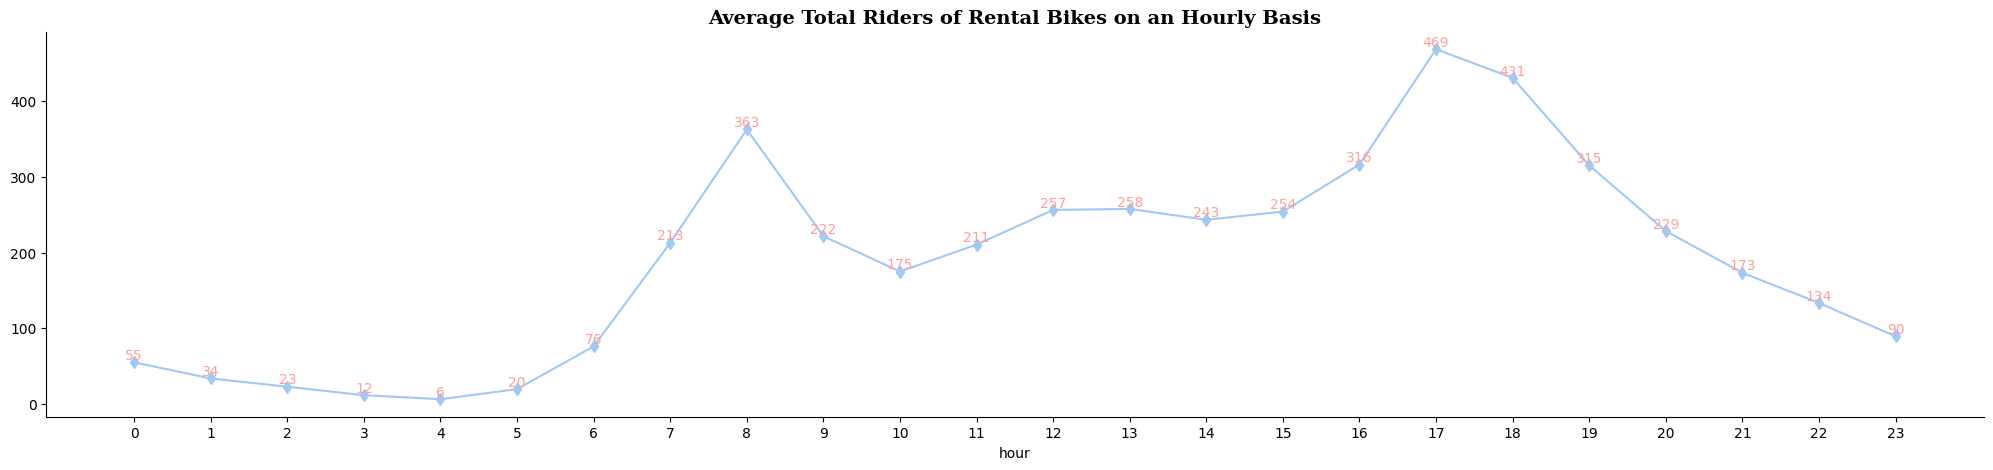

In [ ]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour #extracting the hour from the datetime column

# Calculating the total number of casual and registered users for each hour
df['total_riders'] = df[['casual', 'registered']].sum(axis=1)

plt.figure(figsize=(25, 5))
plt.title("Average Total Riders of Rental Bikes on an Hourly Basis",
          fontsize=14, fontfamily='serif', fontweight='bold', color='black')

# Grouping the data by 'hour' and calculating the mean of 'total_riders'
df.groupby('hour')['total_riders'].mean().plot(kind='line', marker='d', color=sns.color_palette("pastel")[0])

# Setting the x-ticks from 0 to 23 (24-hour format)
plt.xticks(np.arange(0, 24))

# Adding labels above the markers
for x, y in df.groupby('hour')['total_riders'].mean().items():
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color=sns.color_palette("pastel")[3])

# Removing the top and right spines for a cleaner look
sns.despine()

# Displaying the plot
plt.show()

**Average total_riders of rental bikes on an daily basis**

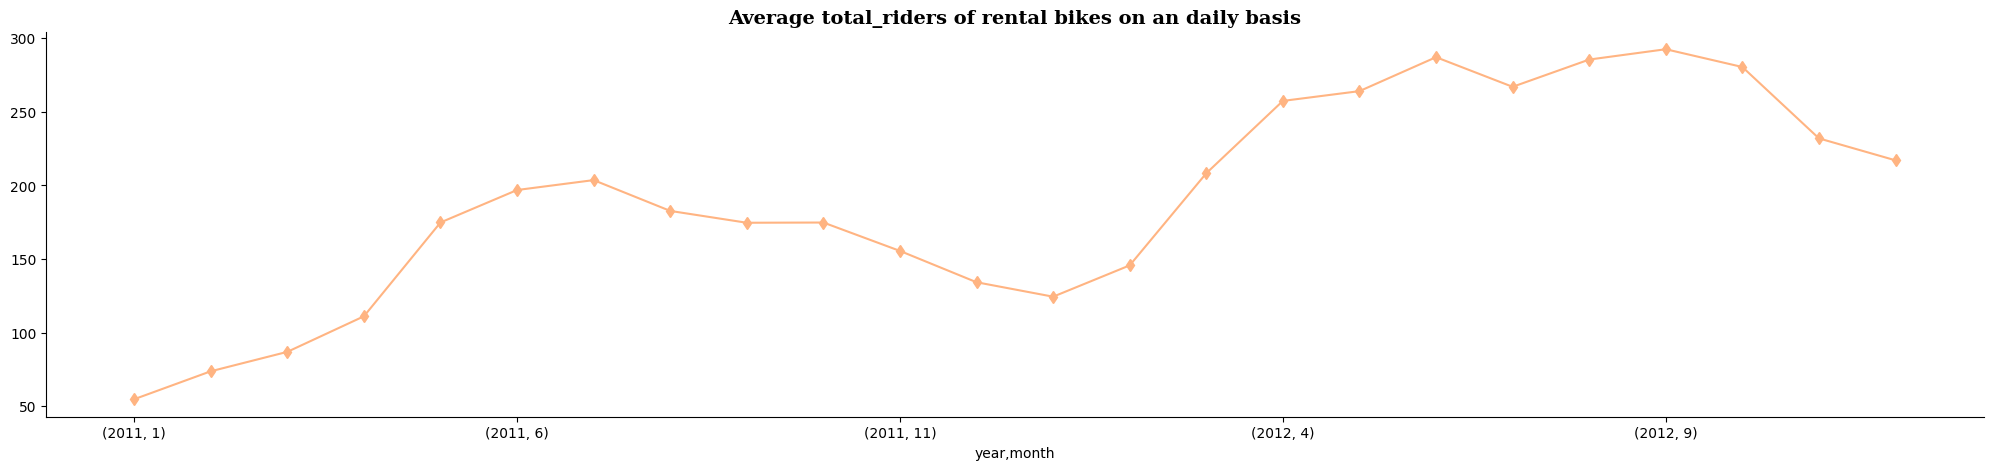

In [ ]:
df['year'] = pd.to_datetime(df['datetime']).dt.year #extracting the year from the datetime column
df['month'] = pd.to_datetime(df['datetime']).dt.month #extracting the month from the datetime column

cp = sns.color_palette("pastel") #defining the color palette

plt.figure(figsize = (25,5)) #setting the figure size
plt.title("Average total_riders of rental bikes on an daily basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',color='black') #setting the title of the plot

#grouping the data by year and month and calculating the mean of total_riders
df.groupby(['year','month'])['total_riders'].mean().plot(kind = 'line', marker = 'd',color=cp[1])


sns.despine()
plt.show() #displaying the plot

- These patterns indicate that there is a distinct fluctuation in total_riders throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

- These patterns indicate that there is a distinct fluctuation in count throughout the month,yearwise but gradually increasing the count of total_riders

In [ ]:
# counts based on months
monthly_count = df.groupby('month')['count'].sum().reset_index()

monthly_count = monthly_count.sort_values(by='count', ascending=False) #sorting the data in descending order

monthly_count

month   count
5       6  220733
6       7  214617
7       8  213516
8       9  212529
9      10  207434
4       5  200147
10     11  176440
3       4  167402
11     12  160160
2       3  133501
1       2   99113
0       1   79884

<ipython-input-185-7da8505f273c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=monthly_count, palette='flare', width = 0.4) #plotting the barplot


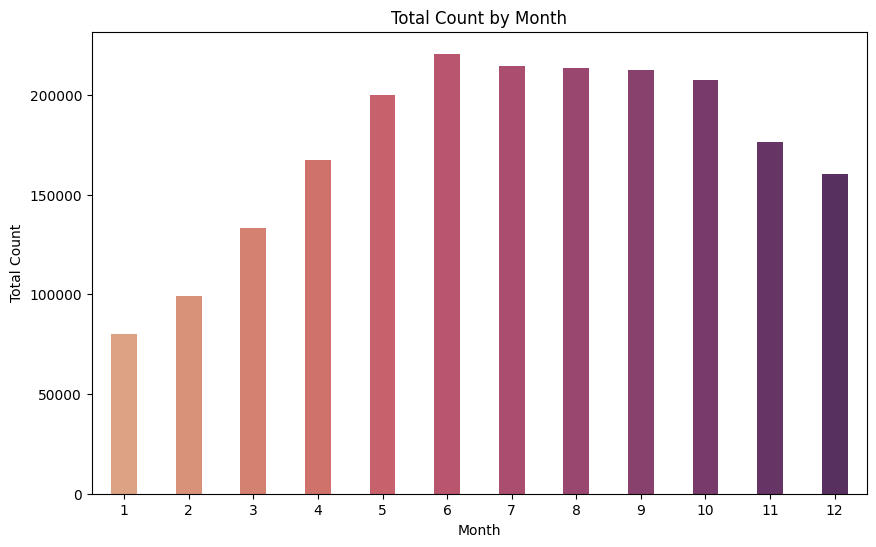

In [ ]:
# rentals on monthly counts

plt.figure(figsize=(10, 6)) #setting the figure size
sns.barplot(x='month', y='count', data=monthly_count, palette='flare', width = 0.4) #plotting the barplot

plt.title('Total Count by Month') #setting the title of the plot
plt.xlabel('Month') #setting the x-axis label
plt.ylabel('Total Count') #setting the y-axis label
plt.show() #displaying the plot

- June stands out as the peak month for bike rentals, with the highest count of 220,733, followed closely by July and August.

- January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

# **SHAPIRO-Wilks Test**

In [ ]:
df.columns #prints the columns in the dataset

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'total_riders', 'year', 'month'],
      dtype='object')

In [ ]:
from scipy.stats import shapiro #importing the shapiro test
for i in list(df.columns[5:-2]): #iterating through the columns

    print() #printing a new line
    test_statistic, p_value = shapiro(df[i]) #applying the shapiro test
    print(f'Normality Testing for {i} :') #printing the column name
    print("-"*30)

    print(f"The test-statistic for {i} is {test_statistic} with p_value {p_value}") #printing the test statistic and p value

    if p_value > 0.05: #checking if the p value is greater than 0.05
        print("Hence at 95% confidence level, we fail to reject null hypothesis")
        print(f"Hence we can say that {i} is normally distributed population") #printing the result

    else: #if the p value is less than 0.05
        print("Hence at 95% confidence level, we reject null hypothesis")
        print(f"Hence we can say that {i} is not normally distributed population") #printing the result

    print() #printing a new line
    print("-"*100) #printing a line




Normality Testing for temp :
------------------------------
The test-statistic for temp is 0.9804052990118979 with p_value 4.4416921644612106e-36
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that temp is not normally distributed population

----------------------------------------------------------------------------------------------------

Normality Testing for atemp :
------------------------------
The test-statistic for atemp is 0.9815304574471947 with p_value 3.220898326923054e-35
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that atemp is not normally distributed population

----------------------------------------------------------------------------------------------------

Normality Testing for humidity :
------------------------------
The test-statistic for humidity is 0.982258701470504 with p_value 1.2220289155107286e-34
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that humidity is not norma

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


# **PAIRPLOT ANALYSIS**

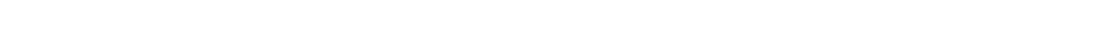

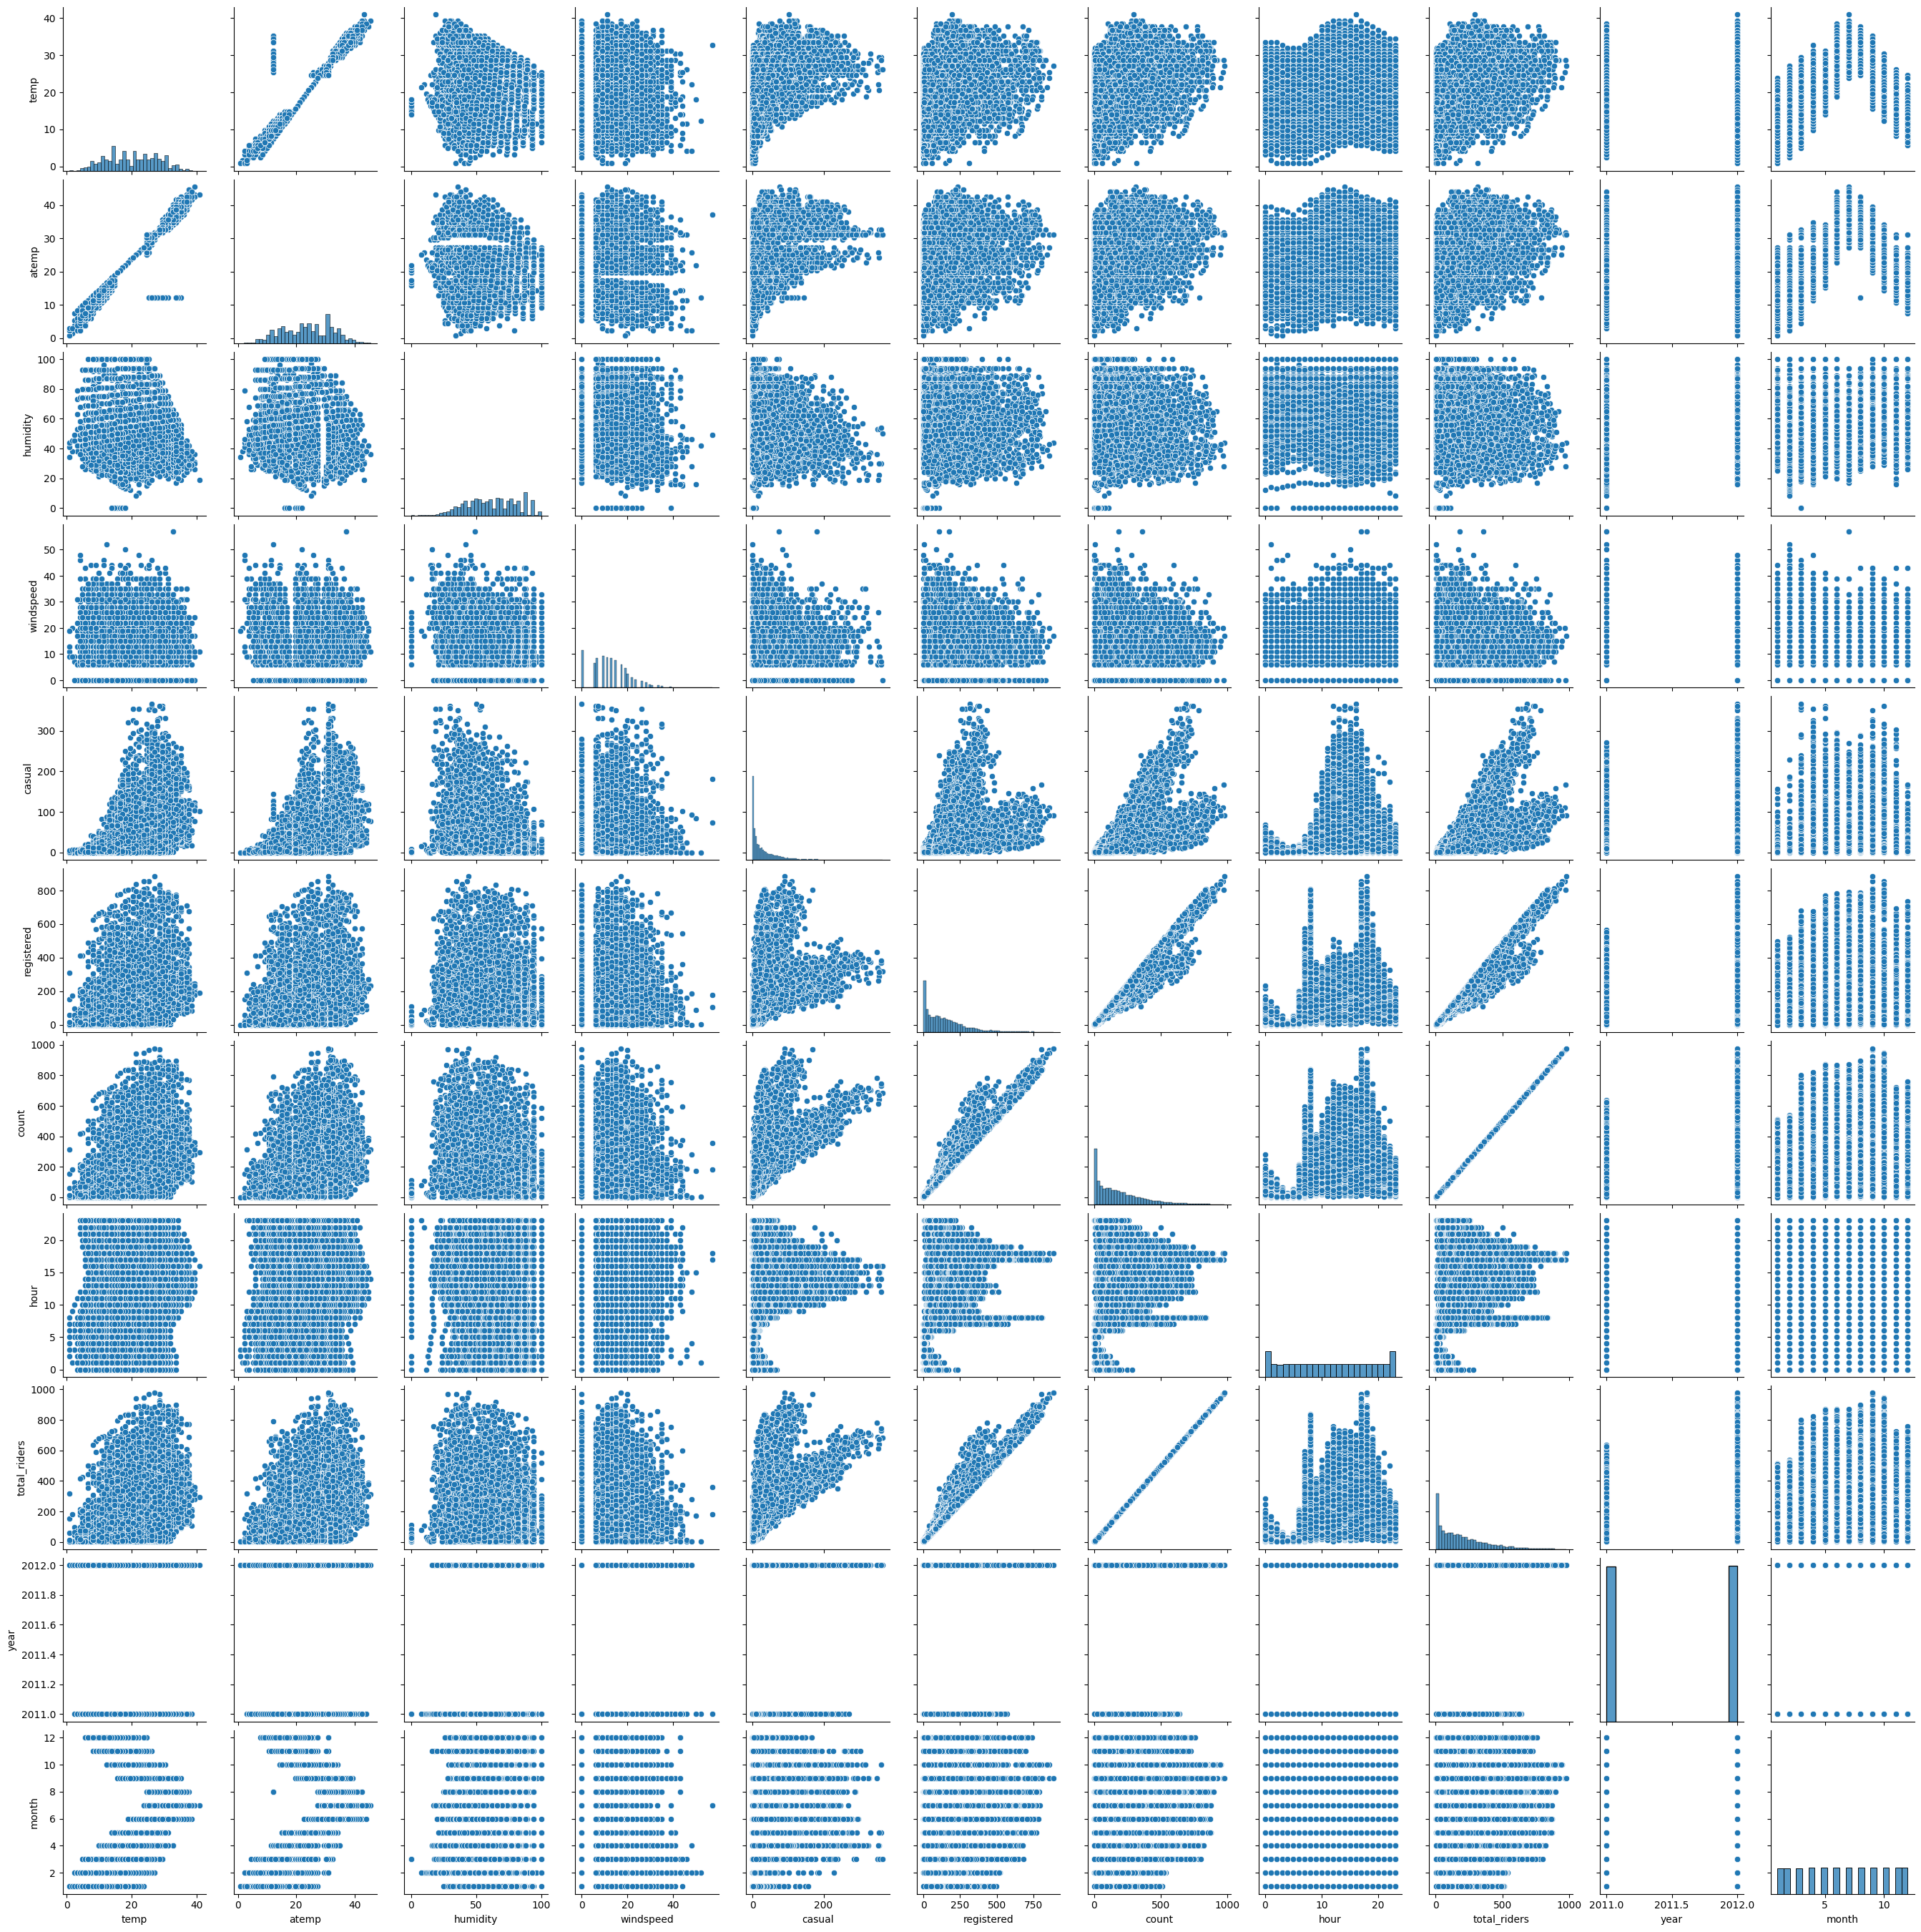

In [ ]:
plt.figure(figsize=(14,0.05)) #setting the figure size
plt.axis('off') #removing the axis
plt.title(f' Pairplot Analysis ',fontfamily='serif',fontweight='bold',fontsize=15,color='w') #setting the title of the plot
sns.pairplot(data=df)
plt.show() #displaying the plot

# **HYPOTHESIS TESTING**

---


# **Hypothesis test 1.** **Chi-sqaure**
test to check if **WEATHER** has an effect on the **SEASONS**

---



**Null Hypothesis (H0)** = Weather is independent of the season

**Alternate Hypothesis (H1)** = Weather is not independent of the season

In [ ]:
data = pd.crosstab(df['season'], df['weather']) #contingency table
data

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

In [ ]:
val= stats.chi2_contingency(data) #Chi-square test
val
expected = val[3] #expected values
expected

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [ ]:

data = pd.crosstab(df['season'], df['weather'])  # Contingency table

# Performing Chi-Square Test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data)

# Calculating the critical value for the 0.05 significance level
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, dof)

# Displaying the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value at 0.05 significance level: {critical_value}")
print(f"P-value: {p_val}")

# Conclusion
if chi2_stat > critical_value:
    print("Reject the null hypothesis (H0): Weather is not independent of the season.")
else:
    print("Fail to reject the null hypothesis (H0): Weather is independent of the season.")

if p_val < alpha:
    print("Reject the null hypothesis (H0) based on p-value: Weather is not independent of the season.")
else:
    print("Fail to reject the null hypothesis (H0) based on p-value: Weather is independent of the season.")

Chi-square Statistic: 49.158655596893624
Degrees of Freedom: 9
Critical Value at 0.05 significance level: 16.918977604620448
P-value: 1.549925073686492e-07
Reject the null hypothesis (H0): Weather is not independent of the season.
Reject the null hypothesis (H0) based on p-value: Weather is not independent of the season.


Since P value is less than alpha, we reject the null hypothesis. Which concludes **Weather is not independent of the season**

---





---
# **Hypothesis test . ANNOVA**
**to check if No. of cycles rented is similar or different in different**
**1. weather** **2. Season**

- **Null Hypothesis**: Number of cycles rented is similar in different weather and season.
- **Alternate Hypothesis:** Number of cycles rented is not similar in different weather and season.
- **Significance level (alpha):** 0.05

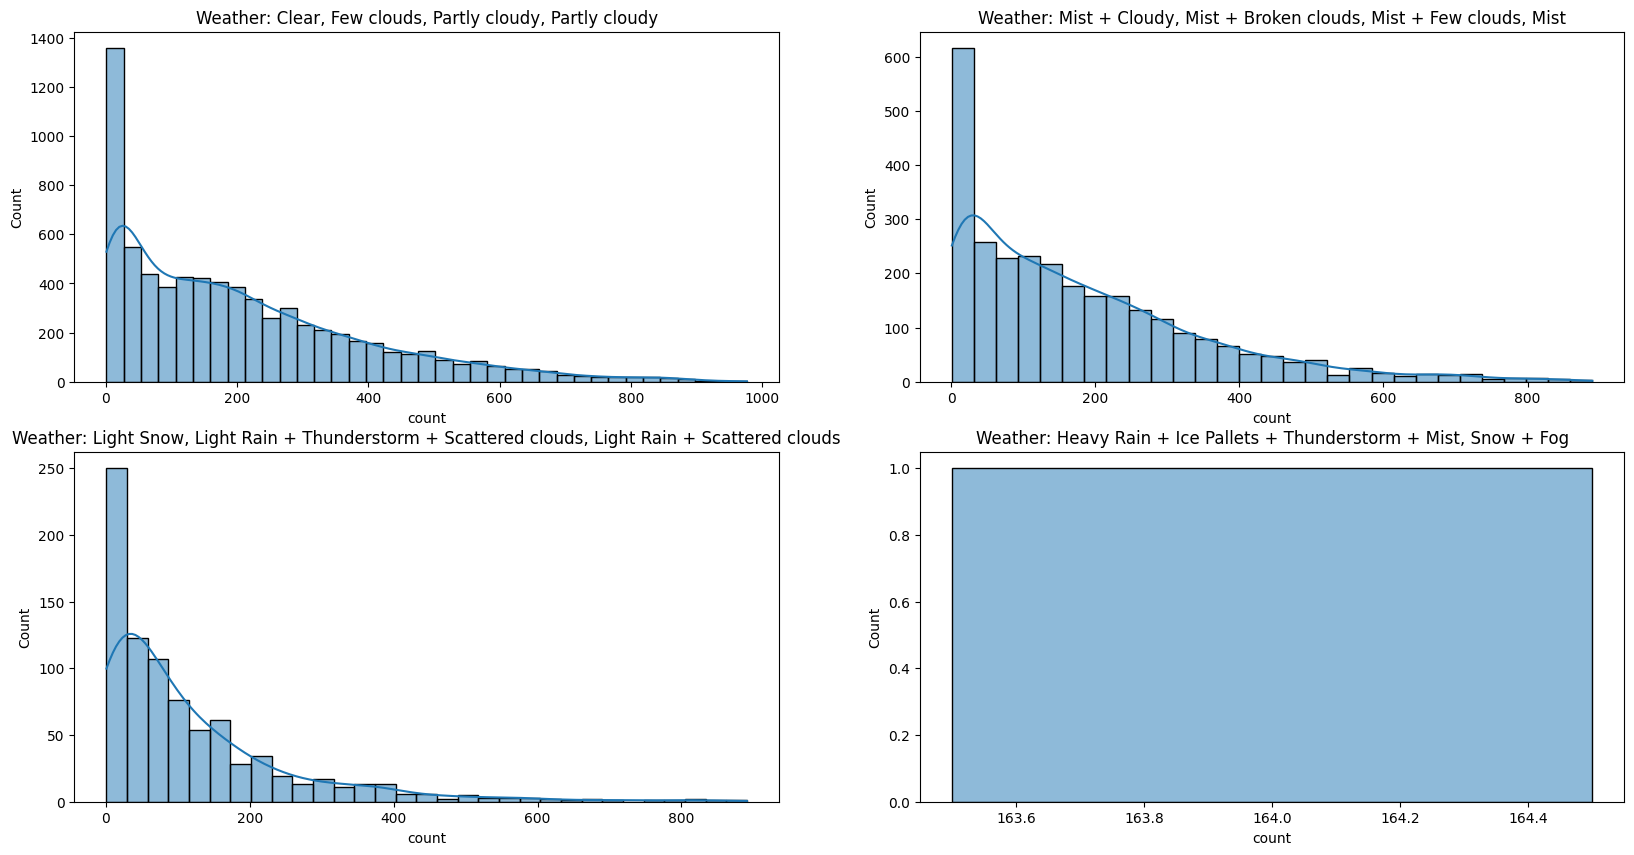

In [ ]:
plt.figure(figsize=(20,10)) #setting the figure size
weather1 = df[df['weather']==1][['count']] #filtering the data for weather 1
plt.subplot(2,2,1) #setting the subplot

sns.histplot(data=weather1, x='count',kde=True) #plotting the histogram
plt.title("Weather: Clear, Few clouds, Partly cloudy, Partly cloudy") #setting the title of the plot

weather2 = df[df['weather']==2][['count']] #filtering the data for weather 2
plt.subplot(2,2,2)
sns.histplot(data=weather2, x='count',kde=True)
plt.title("Weather: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist")

weather3 = df[df['weather']==3][['count']] #filtering the data for weather 3
plt.subplot(2,2,3)
sns.histplot(data=weather3,x='count',kde=True)
plt.title("Weather: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds")

weather4 = df[df['weather']==4][['count']] #filtering the data for weather 4
plt.subplot(2,2,4)
sns.histplot(data=weather4,x='count',kde=True)
plt.title("Weather: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")

plt.show()

**Visualizing Season data**

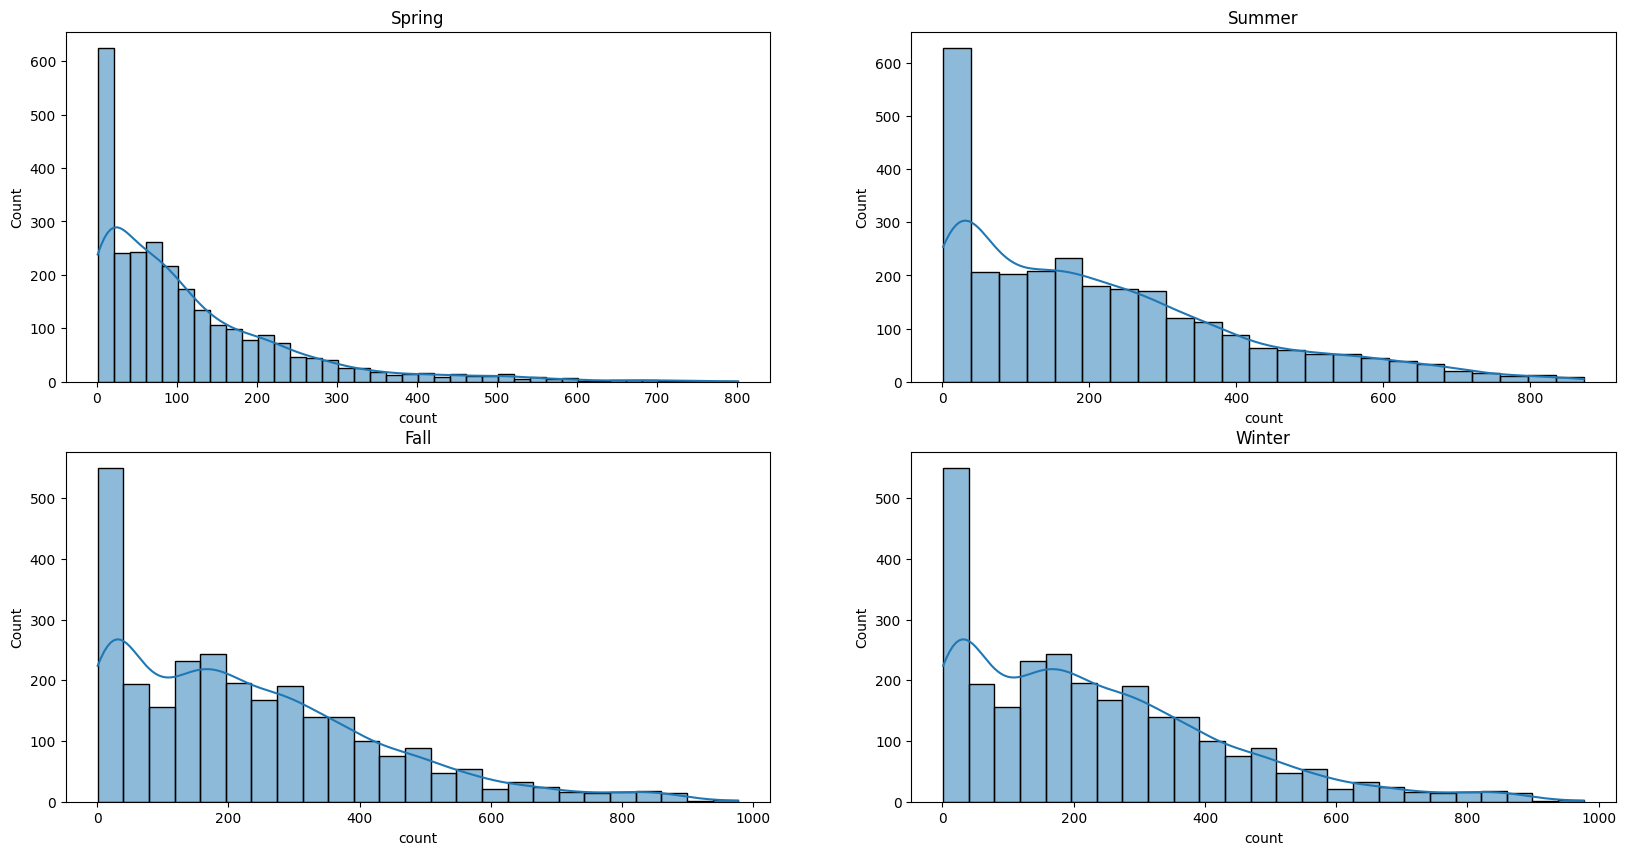

In [ ]:
plt.figure(figsize=(20,10)) #setting the figure size
season1 = df[df['season']==1][['count']] #filtering the data for season 1
plt.subplot(2,2,1) #setting the subplot
sns.histplot(data=season1, x='count',kde=True) #plotting the histogram
plt.title("Spring") #setting the title of the plot

season2 = df[df['season']==2][['count']] #filtering the data for season 2
plt.subplot(2,2,2)
sns.histplot(data=season2, x='count',kde=True)
plt.title("Summer")

season3 = df[df['season']==3][['count']] #filtering the data for season 3
plt.subplot(2,2,3)
sns.histplot(data=season3, x='count',kde=True)
plt.title("Fall")

season4 = df[df['season']==4][['count']] #filtering the data for season 4
plt.subplot(2,2,4)
sns.histplot(data=season3, x='count',kde=True)
plt.title("Winter")

plt.show() #displaying the plot

In [ ]:
stats.f_oneway(weather1, weather2, weather3, weather4, season1, season2, season3, season4)

F_onewayResult(statistic=array([127.9666125]), pvalue=array([2.80747717e-185]))

Since the P-Value is less than alpha, we **reject the Null Hypothesis**. Which conclused **Number of cycles rented is not similar in different weather and season.**

# **QQ Plot Test**
**for checking normal distribution**

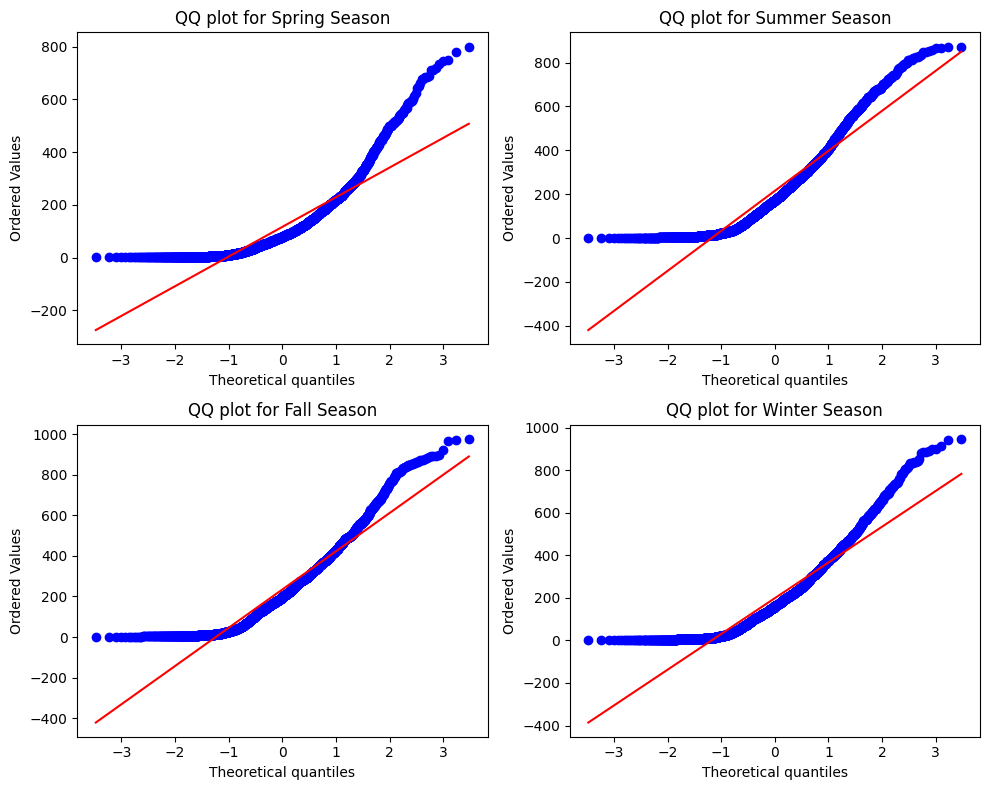

In [ ]:
# Defining a mapping from integer to season names
season_mapping = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}

# Creating a figure and subplots
plt.figure(figsize=(10, 8))

for i, (season_int, season_name) in enumerate(season_mapping.items(), 1):
    # Filtering data for the current season
    df_season = df.loc[df['season'] == season_int, 'count']

    # Plotting QQ plot
    plt.subplot(2, 2, i)
    stats.probplot(df_season, dist='norm', plot=plt)
    plt.title(f'QQ plot for {season_name.capitalize()} Season')

plt.tight_layout()
plt.show() #displaying the plot

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


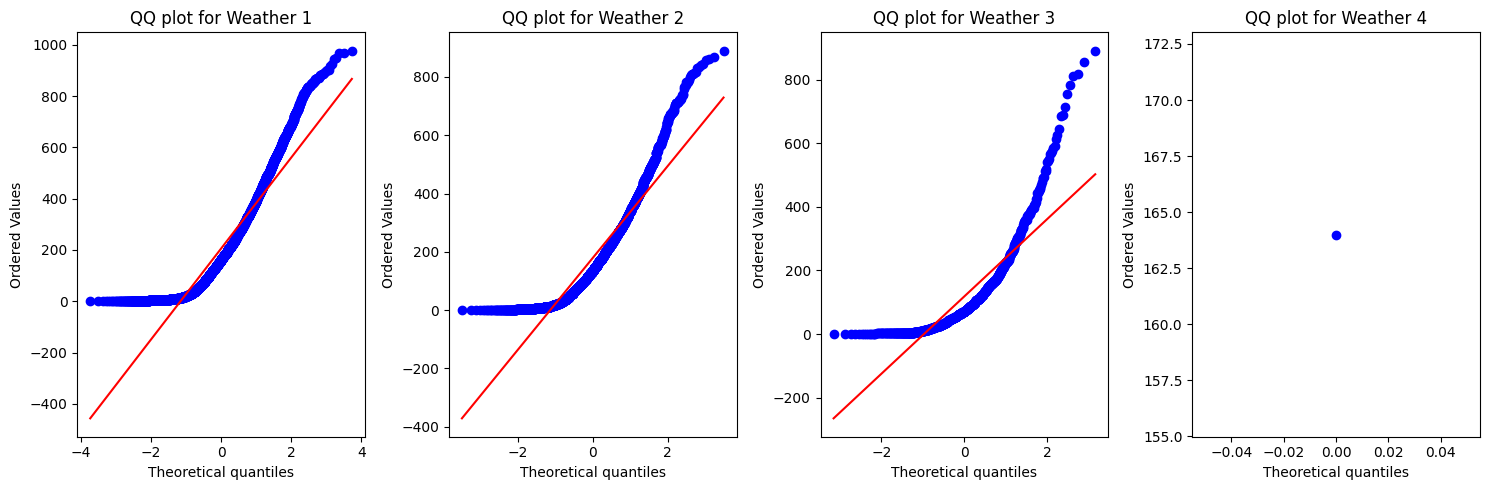

In [ ]:
df_weather1 = df.loc[df['weather'] == 1, 'count'].dropna()
df_weather2 = df.loc[df['weather'] == 2, 'count'].dropna()
df_weather3 = df.loc[df['weather'] == 3, 'count'].dropna()
df_weather4 = df.loc[df['weather'] == 4, 'count'].dropna()

# Creating QQ plots
plt.figure(figsize=(15, 5)) #setting the figure size

plt.subplot(1, 4, 1)
stats.probplot(df_weather1, dist='norm', plot=plt)
plt.title('QQ plot for Weather 1')

plt.subplot(1, 4, 2)
stats.probplot(df_weather2, dist='norm', plot=plt)
plt.title('QQ plot for Weather 2')

plt.subplot(1, 4, 3)
stats.probplot(df_weather3, dist='norm', plot=plt)
plt.title('QQ plot for Weather 3')

plt.subplot(1, 4, 4)
stats.probplot(df_weather4, dist='norm', plot=plt)
plt.title('QQ plot for Weather 4')

plt.tight_layout()
plt.show()

As per the above graph, seasons and weathers are not following the gaussian distributions so we need to perform Shapiro's test to check normal distribution

# **Shapiro's Test for Seasons**

In [ ]:
# Filtering data for Spring
df_spring = df[df['season'] == 1]['count'].dropna()

# Running Shapiro-Wilk test
stat, p_value = shapiro(df_spring)

# Prints p-value and test result
print('Spring season p-value:', p_value)
if p_value < 0.05:
    print('The spring season does not follow the normal distribution')
else:
    print('The spring season follows the normal distribution')

Spring season p-value: 8.749584618867662e-49
The spring season does not follow the normal distribution


In [ ]:
df_summer = df[df['season'] == 2]['count'].dropna()

# Running Shapiro-Wilk test
stat, p_value = shapiro(df_summer)

# Prints p-value and test result
print('Summer season p-value:', p_value)
if p_value < 0.05:
    print('The summer season does not follow the normal distribution')
else:
    print('The summer season follows the normal distribution')

Summer season p-value: 6.039374406270491e-39
The summer season does not follow the normal distribution


In [ ]:
df_fall = df[df['season'] == 3]['count'].dropna()

# Running Shapiro-Wilk test
stat, p_value = shapiro(df_fall)

# Print p-value and test result
print('Fall season p-value:', p_value)
if p_value < 0.05:
    print('The fall season does not follow the normal distribution')
else:
    print('The fall season follows the normal distribution')

Fall season p-value: 1.043680518918597e-36
The fall season does not follow the normal distribution


In [ ]:
df_winter = df[df['season'] == 4]['count'].dropna()

# Running Shapiro-Wilk test
stat, p_value = shapiro(df_winter)

# Print p-value and test result
print('Winter season p-value:', p_value)
if p_value < 0.05:
    print('The winter season does not follow the normal distribution')
else:
    print('The winter season follows the normal distribution')

Winter season p-value: 1.1299244409282836e-39
The winter season does not follow the normal distribution


# **Shapiro's Test for Weather**

In [ ]:
# Filtering and sample data for Weather 1
df_weather1 = df[df['weather'] == 1]['count'].dropna().sample(n=5000, random_state=1)

# Running Shapiro-Wilk test
stat, p_value = shapiro(df_weather1)

# Prints p-value and test result
print('Weather 1 p-value:', p_value)
if p_value < 0.05:
    print('Weather 1 does not follow the normal distribution')
else:
    print('Weather 1 follows the normal distribution')

Weather 1 p-value: 1.194149907502766e-50
Weather 1 does not follow the normal distribution


In [ ]:
df_weather2 = df[df['weather'] == 2]['count'].dropna()

# Running Shapiro-Wilk test
stat, p_value = shapiro(df_weather2)

# Print p-value and test result
print('Weather 2 p-value:', p_value)
if p_value < 0.05:
    print('Weather 2 does not follow the normal distribution')
else:
    print('Weather 2 follows the normal distribution')

Weather 2 p-value: 9.777839106111785e-43
Weather 2 does not follow the normal distribution


In [ ]:
# Filtering data for Weather 3
df_weather3 = df[df['weather'] == 3]['count'].dropna()


# Running Shapiro-Wilk test
stat, p_value = shapiro(df_weather3)

# Print p-value and test result
print('Weather 3 p-value:', p_value)
if p_value < 0.05:
    print('Weather 3 does not follow the normal distribution')
else:
    print('Weather 3 follows the normal distribution')

Weather 3 p-value: 3.875893017396149e-33
Weather 3 does not follow the normal distribution


Since there is only one record for weather category 4 so cannot perform Shapiro's test on it

The results of the Shapiro's test suggest that the distributions of weather and seasons **deviate from the normal distribution**

# **Levene's test**
for checking homogeneity of variance

**Null Hypothesis (H0)** = Variances of two groups are same  
**Alternative Hypothesis (HA)** = Variances of two groups are different

In [ ]:


# Sample data for different weather conditions and seasons
df_weather1 = df[df['weather'] == 1]['count'].dropna()
df_weather2 = df[df['weather'] == 2]['count'].dropna()
df_weather3 = df[df['weather'] == 3]['count'].dropna()
df_weather4 = df[df['weather'] == 4]['count'].dropna()

df_spring = df[df['season'] == 1]['count'].dropna()
df_summer = df[df['season'] == 2]['count'].dropna()
df_fall = df[df['season'] == 3]['count'].dropna()
df_winter = df[df['season'] == 4]['count'].dropna()

# Running Levene's test for equal variances
levene_stat, p_value = levene(
    df_weather1,
    df_weather2,
    df_weather3,
    df_weather4,
    df_spring,
    df_summer,
    df_fall,
    df_winter
)

# Print p-value and test result
print('Levene’s test p-value:', p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis, Variances are not equal")
else:
    print("Fail to Reject the Null hypothesis, Variances are equal")


Levene’s test p-value: 3.463531888897594e-148
Reject the Null hypothesis, Variances are not equal


Since QQ Test, Shapiro's Test as well as Levene's Test has been failed so we cannot perform Anova Test. But as an alternative we can perform kruskal test

# **Kruskal-Wallis test**

In [ ]:


# Sample data for different weather conditions and seasons
df_weather1 = df[df['weather'] == 1]['count'].dropna()
df_weather2 = df[df['weather'] == 2]['count'].dropna()
df_weather3 = df[df['weather'] == 3]['count'].dropna()
df_weather4 = df[df['weather'] == 4]['count'].dropna()

df_spring = df[df['season'] == 1]['count'].dropna()
df_summer = df[df['season'] == 2]['count'].dropna()
df_fall = df[df['season'] == 3]['count'].dropna()
df_winter = df[df['season'] == 4]['count'].dropna()

# Running Kruskal-Wallis test
kruskal_stat, p_value = kruskal(
    df_weather1,
    df_weather2,
    df_weather3,
    df_weather4,
    df_spring,
    df_summer,
    df_fall,
    df_winter
)

# Print p-value and test result
print(f"P Value is coming as {p_value}")
if p_value < 0.05:
    print(f"Since p-value is {p_value} less than 0.05, we reject the null hypothesis")
else:
    print(f"Since p-value is {p_value} greater than or equal to 0.05, we fail to reject the null hypothesis")

P Value is coming as 4.614440933900297e-191
Since p-value is 4.614440933900297e-191 less than 0.05, we reject the null hypothesis


**Conclusion:**

- The analysis conducted on the data regarding the number of cycles rented across different weather conditions and seasons reveals the following insights:

**Normality Check with Shapiro-Wilk Test:**

- The Shapiro-Wilk test was performed to check for normality across different weather conditions and seasons.
- The results indicated that the distributions for both weather conditions and seasons deviate significantly from the normal distribution (p-value < 0.05 in most cases).
- This deviation from normality suggests that parametric tests, which assume normality, may not be appropriate for this data.

**Kruskal-Wallis Test:**

- Given the non-normal distributions, the Kruskal-Wallis test, a non-parametric method, was employed to compare the number of cycles rented across different weather conditions and seasons.
- The p-value obtained from the Kruskal-Wallis test was extremely low (p = 4.61e-191), which is much less than the significance level of 0.05.
- This result leads us to reject the null hypothesis, indicating that there is a statistically significant difference in the number of cycles rented across
different weather conditions and seasons.

**Summary:**

- The number of cycles rented is significantly influenced by both weather conditions and seasons.
- The distributions of cycle rentals under different weather and seasonal conditions are not normally distributed, reinforcing the choice of non-parametric testing methods.
- The significant p-value from the Kruskal-Wallis test confirms that the variation in cycle rentals across different weather and seasonal conditions is not due to random chance, but rather reflects genuine differences in rental patterns.


# **Hypothesis test . Sample T-Test**
 to check if **WORKING DAY** has an effect on the number of electric cycles rented :
- **Null Hypothesis:** Working day has no effect on the number of cycles being rented.
- **Alternate Hypothesis:** Working day has effect on the number of cycles being rented

In [ ]:
data1 = df[df['workingday'] == 1]['count'] #working day
data2 = df[df['workingday'] == 0]['count'] #non-working day

np.var(data1), np.var(data2) #variance of the two samples

(34040.69710674686, 30171.346098942427)

Before performing a two-sample T-Test, it's important to determine whether the two data groups have similar variances. If the ratio of the larger group's variance to the smaller group's variance is less than 4:1,we can assume that the data groups have equal variances.

*Here, the ratio is 34040.70 / 30171.35 which is less than 4:1*

In [ ]:
stats.ttest_ind(a=data1, b=data2, equal_var= True) #two sample t-test

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since pvalue is greater than 0.05 so we **cannot reject the Null hypothesis.**

# **Business Insights**

- Bike rentals surge to their highest levels during the summer months, while winter experiences a notable drop in demand. Clear skies are closely tied to the highest rental numbers, but the figures plummet during adverse conditions like rain, thunderstorms, snow, or fog.

- Humidity, windspeed, temperature, and weather conditions are intricately linked with the season, collectively influencing the number of bikes rented. Colder temperatures correlate with decreased rentals, with demand progressively increasing as the weather warms up.

- The pattern of bike rentals exhibits a clear peak during daylight hours, gradually tapering off through the night, highlighting distinct fluctuations throughout the day. On holidays and weekends, bike rentals tend to be lower, with a noticeable uptick on non-working days. However, the overall rental figures on regular working days and non-holidays remain comparable.

- Casual riders predominantly take to the streets on weekends, while registered users show increased activity during the workweek. Analyzing hourly rental data reveals substantial growth from 2011 to 2012, demonstrating the system's expanding popularity.

- Approximately 19% of users are casual riders, with the remaining 81% being registered users. Seasonal trends are evident, with peak demand occurring in spring and summer, followed by a decline in fall and winter. The months of January through March witness the lowest rental activity, while daily trends indicate a significant spike in usage during the afternoon hours.

- Bike rentals thrive in clear or partly cloudy weather conditions, whereas extreme weather sees limited participation, reflecting the scarce data available under such circumstances. There is a strong positive correlation between actual temperature and perceived temperature, as well as between the number of registered users and the total number of riders.

- The influence of weather-related factors on bike rental numbers is limited, as observed in the correlation data. ANOVA tests affirm that seasons and weather conditions have a statistically significant impact on bike rentals.
- However, a two-sample t-test suggests that the distinction between working days and holidays has a minimal effect on rental counts. Finally, a Chi-Square test confirms the dependence of weather patterns on seasonal variations.

# **Strategic Recommendations for Yulu's Profitable Growth**

**Maximize Bike Distribution During High-Demand Periods:**

Prioritize the deployment of bikes during peak usage months, particularly in June, July, and August. These months are characterized by increased demand due to favorable weather conditions, making them ideal for maximizing bike availability and ensuring that Yulu can capture the surge in ridership. By strategically concentrating resources during these periods, Yulu can meet heightened customer demand and significantly boost rental revenue.

**Seasonal Marketing Initiatives:**

Develop and implement tailored marketing campaigns that align with seasonal trends. For instance, intensify promotional efforts during the summer months when ridership naturally increases. By highlighting the benefits of biking in warm weather and promoting special offers, Yulu can attract a larger audience, increase brand visibility, and drive higher user engagement during these optimal months.

**Boost Engagement During Off-Peak Months:**

To sustain steady revenue throughout the year, introduce targeted promotional strategies during off-peak months, such as January through March. These could include discounts, loyalty rewards, or bundled rental packages designed to incentivize usage when demand typically wanes. This approach will help maintain a consistent revenue stream and keep users engaged even during slower periods.

**Dynamic, Weather-Adaptive Pricing Models:**

Implement a flexible pricing strategy that adjusts in response to real-time weather conditions. For instance, during extreme weather events like heavy rain or intense heat, consider offering discounted rates to encourage continued usage. Conversely, on days with ideal biking weather, slightly higher rates could be applied to optimize revenue. This dynamic approach allows Yulu to maximize profitability while remaining responsive to external factors.

**Expand Revenue Avenues:**

Explore and develop alternative revenue streams to enhance Yulu’s financial stability. Potential opportunities include forming partnerships with local businesses or sponsors, offering premium membership services with exclusive benefits, or integrating value-added services within the Yulu app. Diversifying income sources will not only increase overall profitability but also reduce reliance on seasonal fluctuations.
.

**Strategic Bike Deployment Throughout the Workweek:**

Given the observed uniformity in bike rentals between working and non-working days, optimize bike deployment strategies to ensure consistent availability and resource utilization across the entire week. This approach will ensure that bikes are efficiently distributed, catering to demand patterns without unnecessary over-concentration on specific days.

**Weather-Sensitive Promotional Strategies:**

Develop promotions that are responsive to weather conditions. For instance, during rainy days, offer special deals or incentives to motivate users to rent bikes despite less favorable weather. This approach not only maintains usage levels but also demonstrates Yulu’s adaptability to changing circumstances, enhancing customer loyalty.

**Season-Specific Promotional Campaigns:**

Customize promotional efforts according to the season to resonate with the needs and preferences of users during different times of the year. For example, during the summer months of June, July, and August, emphasize the benefits of outdoor biking with summer-themed promotions. Similarly, adapt marketing messages during colder months to highlight the practicality of Yulu bikes as a convenient transportation option.





